In [13]:
from tensorflow.keras.models import load_model

model = load_model('gru_model/Quickdraw5Class1GRU.h5')

In [14]:
model.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 100, 3)]          0         
                                                                 
 gru_13 (GRU)                (None, 128)               51072     
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 256)               33024     
                                                                 
 dropout_16 (Dropout)        (None, 256)               0         
                                                                 
 dense_28 (Dense)            (None, 128)               32896     
                                                                 
 rnn_densef (Dense)          (None, 5)                 645

In [15]:
import hls4ml
import os
os.environ['PATH'] = '/opt/Xilinx/Vivado/2019.2/bin:' + os.environ['PATH']

In [16]:
def print_dict(d, indent=0):
    for key, value in d.items():
        print('  ' * indent + str(key), end='')
        if isinstance(value, dict):
            print()
            print_dict(value, indent + 1)
        else:
            print(':' + ' ' * (20 - len(key) - 2 * indent) + str(value))

config = hls4ml.utils.config_from_keras_model(model, granularity='model', default_precision='ap_fixed<18,8>')
config['Model']['ReuseFactor'] = 30
config['Model']['Strategy']='Resource'
print("-----------------------------------")
print_dict(config)
print("-----------------------------------")


hls_model = hls4ml.converters.convert_from_keras_model(model,
                                                       hls_config=config,
                                                       output_dir='hls/quickdraw_gru_hls4ml_prj',
                                                       part='xcu250-figd2104-2L-e'
                                                       )

Interpreting Model
Topology:
Layer name: input_16, layer type: InputLayer, input shapes: [[None, 100, 3]], output shape: [None, 100, 3]
Layer name: gru_13, layer type: GRU, input shapes: [[None, 100, 3]], output shape: [None, 128]
Layer name: dense_27, layer type: Dense, input shapes: [[None, 128]], output shape: [None, 256]
Layer name: dense_28, layer type: Dense, input shapes: [[None, 256]], output shape: [None, 128]
Layer name: rnn_densef, layer type: Dense, input shapes: [[None, 128]], output shape: [None, 5]
-----------------------------------
Model
  Precision:         ap_fixed<18,8>
  ReuseFactor:       30
  Strategy:          Resource
  BramFactor:        1000000000
  TraceOutput:       False
-----------------------------------
Interpreting Model
Topology:
Layer name: input_16, layer type: InputLayer, input shapes: [[None, 100, 3]], output shape: [None, 100, 3]
Layer name: gru_13, layer type: GRU, input shapes: [[None, 100, 3]], output shape: [None, 128]
Layer name: dense_27, l

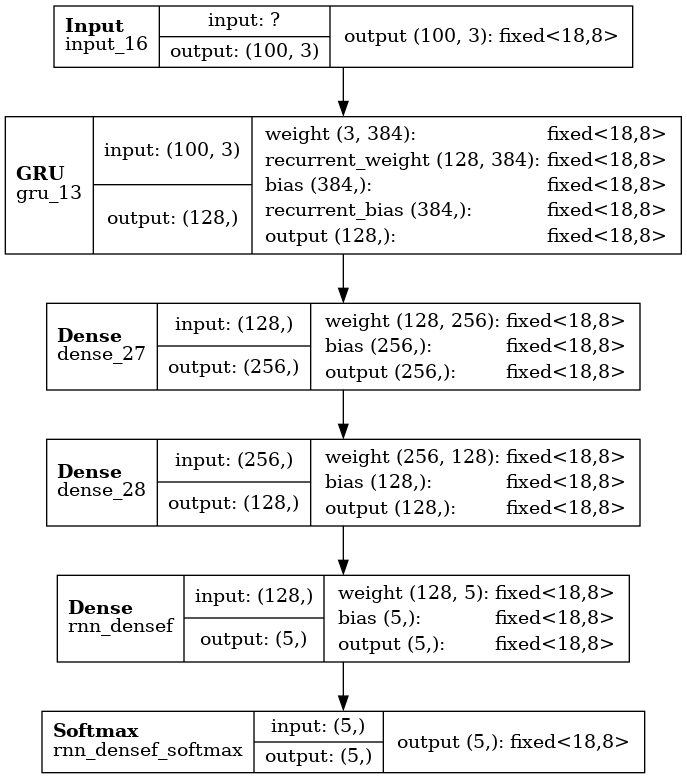

In [17]:
hls4ml.utils.plot_model(hls_model, show_shapes=True, show_precision=True, to_file=None)

In [18]:
hls_model.compile()

Writing HLS project
Done


In [19]:
import numpy as np
import matplotlib.pyplot as plt

x_test = np.load('data/x_test.npy')
y_test = np.load('data/y_test.npy')

indices = np.random.choice(len(x_test), 500)

x_test = x_test[indices]
y_test = y_test[indices]

y_keras = model.predict(x_test)
keras_accuracy = np.mean(np.argmax(y_test, axis=1) == np.argmax(y_keras, axis=1))
print('Keras accuracy:  ', keras_accuracy)

y_hls = hls_model.predict(x_test)
hsl_accuracy = np.mean(np.argmax(y_test, axis=1) == np.argmax(y_hls, axis=1))
print('hls4ml accuracy: ', hsl_accuracy)


16/16 [==============================] - 0s 13ms/step
Keras accuracy:   0.926
hls4ml accuracy:  0.826


In [20]:
hls_model.build(csim=False, synth=True, vsynth=True)


****** Vivado(TM) HLS - High-Level Synthesis from C, C++ and SystemC v2019.2 (64-bit)
  **** SW Build 2708876 on Wed Nov  6 21:39:14 MST 2019
  **** IP Build 2700528 on Thu Nov  7 00:09:20 MST 2019
    ** Copyright 1986-2019 Xilinx, Inc. All Rights Reserved.

source /tools/Xilinx/Vivado/2019.2/scripts/vivado_hls/hls.tcl -notrace
INFO: [HLS 200-10] Running '/tools/Xilinx/Vivado/2019.2/bin/unwrapped/lnx64.o/vivado_hls'
INFO: [HLS 200-10] For user 'jiuyal2' on host 'Duo16.' (Linux_x86_64 version 5.15.146.1-microsoft-standard-WSL2) on Wed Feb 28 03:35:48 PST 2024
INFO: [HLS 200-10] On os Ubuntu 18.04.6 LTS
INFO: [HLS 200-10] In directory '/home/jiuyal2/HLS4ML_VS_MANUAL/documents/Benchmarks/RNN/quickdraw/hls/quickdraw_gru_hls4ml_prj'
Sourcing Tcl script 'build_prj.tcl'
INFO: [HLS 200-10] Opening project '/home/jiuyal2/HLS4ML_VS_MANUAL/documents/Benchmarks/RNN/quickdraw/hls/quickdraw_gru_hls4ml_prj/myproject_prj'.
INFO: [HLS 200-10] Adding design file 'firmware/myproject.cpp' to the project